<a href="https://colab.research.google.com/github/lucvseco/Credit-Card-Fraud-Detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection


## Importing libraries and loading the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

In [ ]:
ccf = pd.read_csv("creditcard.csv")

## Preliminary statistical analysis of data:

#### Mean, standard deviation, median, maximum and minimum for each database characteristic


In [ ]:
ccf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Verification of data integrity and whether or not there is missing or incomplete data

In [ ]:
ccf.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Define data preprocessing operations

#### Mean removal, normalization, scaling, outlier removal, incomplete data handling, etc.

##### In this case, the dataset "ccf" has two classes: 1 and 0. The samples with "Fraud" was classifieds as 1 and the samples with "No Fraud" was classifieds as 0. Very few transactions are actually fraudulent (less than 1%). The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions
##### The data preprocessing ideal for this case is apply a method named "undersampling" for reduce the numbers of samples with "No Fraud".

In [ ]:
X = ccf.iloc[:, 1:]
y = ccf["Class"]

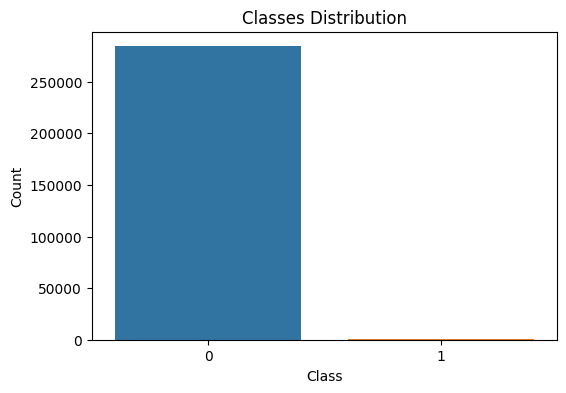

In [ ]:
contagem_classes =  X['Class'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=contagem_classes.index, y=contagem_classes.values)
plt.title('Classes Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
X = ccf.iloc[:, 1:-1]
y = ccf["Class"]

## Undersampling in majority class


In [ ]:
#separando o dataset em dataset de fraudes e não fraudes
X_majority = X[y == 0]
X_minority = X[y == 1]

#fazendo undersampling na classe 0, que não tem fraude
sizeX_minority = len(X_minority)
random_indices = random.sample(range(len(X_majority)), sizeX_minority)
X_majority_undersampled = X_majority.iloc[random_indices]

In [ ]:
#concatenando a classe com undersampling
X = pd.concat([X_majority_undersampled, X_minority])
Y = pd.concat([pd.Series([0] * len(X_majority_undersampled)), pd.Series([1] * len(X_minority))])

## Defening models

In [ ]:
#definição do tamanho dos modelos
test_size = 0.2
num_samples = len(X)

#calculando o tamanho de cada modelo
num_test = int(test_size * num_samples)
num_train = num_samples - num_test
#divisão do modelo
X_train, Y_train = X[:num_train], Y[:num_train]
X_test, Y_test = X[num_train:num_train + num_test], Y[num_train:num_train + num_test]

## Normalize X_train and X_test

In [ ]:
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

## Activation function (ReLu and Sigmoid)

In [ ]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Glorot and He


In [ ]:
np.random.seed(0)
input_size = 29
hidden_sizes = [32, 16, 8, 4]
output_size = 1

#estratégia de Xavier/Glorot
def initialize_weights_xavier(input_size, output_size):
    return np.random.randn(input_size, output_size) / np.sqrt(input_size)

#estratégia de He (para ReLU)
def initialize_weights_he(input_size, output_size):
    return np.random.randn(input_size, output_size) * np.sqrt(2 / input_size)

hidden_sizes = [32, 16, 8, 4]
output_size = 1
weights = []
biases = []
input_size = 29

# Inicialização dos pesos e bias para as camadas ocultas
for size in hidden_sizes:
    weights.append(initialize_weights_he(input_size, size))
    biases.append(np.zeros((1, size)))
    input_size = size

# Inicialização dos pesos e bias para a camada de saída
weights.append(initialize_weights_xavier(input_size, output_size))
biases.append(np.zeros((1, output_size)))

## Optmization, function costs and bias update

In [ ]:
#Forward pass
def forward(input_data):
    activations = []
    for i in range(len(weights)):
        input_data = np.dot(input_data, weights[i]) + biases[i]
        if i < len(weights) - 1:
            input_data = relu(input_data)
        else:
            input_data = sigmoid(input_data)
        activations.append(input_data)
    return activations

learning_rate = 0.0002
epochs = 100
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    total_loss = 0
    correct_train = 0
    correct_val = 0

    for i in range(len(X_train)):
        x = X_train[i]
        y = Y_train[i]

        #forward
        activations = forward(x)

        # Cálculo do erro
        error = y - activations[-1]

        # Cálculo da função de custo
        loss = - (y * np.log(activations[-1]) + (1 - y) * np.log(1 - activations[-1]))
        total_loss += loss

        #backpropagation
        delta = error * (activations[-1] * (1 - activations[-1]))
        for j in range(len(weights) - 1, -1, -1):
            activations[j] = np.clip(activations[j], 1e-15, 1 - 1e-15)
            if j == len(weights) - 1:
                delta_weights = learning_rate * activations[j - 1].reshape(1, -1).T @ delta
            else:
                delta_weights = learning_rate * activations[j - 1].reshape(1, -1).T @ delta
            delta_biases = learning_rate * delta
            delta = np.dot(delta, weights[j].T)
            weights[j] += delta_weights
            biases[j] += delta_biases

        #acurácia de treinamento
        if activations[-1] >= 0.5 and y == 1:
            correct_train += 1
        elif activations[-1] < 0.5 and y == 0:
            correct_train += 1

    #média do erro de treinamento na época atual
    mean_epoch_loss_train = total_loss / len(X_train)
    train_losses.append(mean_epoch_loss_train)
    train_accuracy = correct_train / len(X_train)
    train_accuracies.append(train_accuracy)

    #erro de validação
    total_loss_val = 0
    for i in range(len(X_test)):
        x = X_test[i]
        y = Y_test[i]
        epsilon = 1e-15  #constante para evitar divisão por zero
        loss = - (y * np.log(activations[-1] + epsilon) + (1 - y) * np.log(1 - activations[-1] + epsilon))
        activations = forward(x)
        total_loss_val += loss

        #acurácia de validação
        if activations[-1] >= 0.5 and y == 1:
            correct_val += 1
        elif activations[-1] < 0.5 and y == 0:
            correct_val += 1

    #média do erro de validação na época atual
    mean_epoch_loss_val = total_loss_val / len(X_test)
    val_losses.append(mean_epoch_loss_val)
    val_accuracy = correct_val / len(X_test)
    val_accuracies.append(val_accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss (Treinamento): {mean_epoch_loss_train}, Loss (Validação): {mean_epoch_loss_val}")

Epoch 10/100, Loss (Treinamento): [[0.63674486]], Loss (Validação): [[0.22001097]]
Epoch 20/100, Loss (Treinamento): [[0.54590908]], Loss (Validação): [[0.12119433]]
Epoch 30/100, Loss (Treinamento): [[0.46432471]], Loss (Validação): [[0.12078469]]
Epoch 40/100, Loss (Treinamento): [[0.41763165]], Loss (Validação): [[0.13366406]]
Epoch 50/100, Loss (Treinamento): [[0.39361703]], Loss (Validação): [[0.13833677]]
Epoch 60/100, Loss (Treinamento): [[0.38221766]], Loss (Validação): [[0.13919867]]
Epoch 70/100, Loss (Treinamento): [[0.37891494]], Loss (Validação): [[0.14077237]]
Epoch 80/100, Loss (Treinamento): [[0.38191715]], Loss (Validação): [[0.14626622]]
Epoch 90/100, Loss (Treinamento): [[0.38799266]], Loss (Validação): [[0.15980574]]
Epoch 100/100, Loss (Treinamento): [[0.39497353]], Loss (Validação): [[0.17430957]]


## Grafics

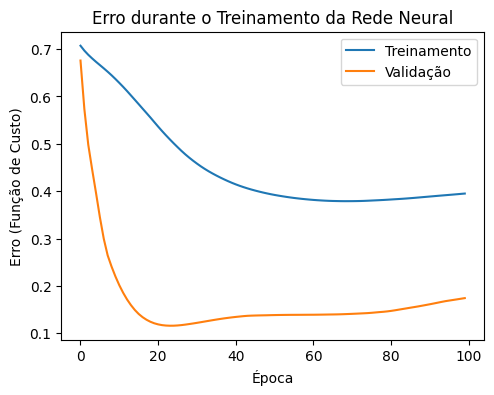

In [ ]:
train_losses = np.array(train_losses).flatten()
val_losses = np.array(val_losses).flatten()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Treinamento')
plt.plot(range(epochs), val_losses, label='Validação')
plt.xlabel('Época')
plt.ylabel('Erro (Função de Custo)')
plt.legend()
plt.title('Erro durante o Treinamento da Rede Neural')
plt.show()

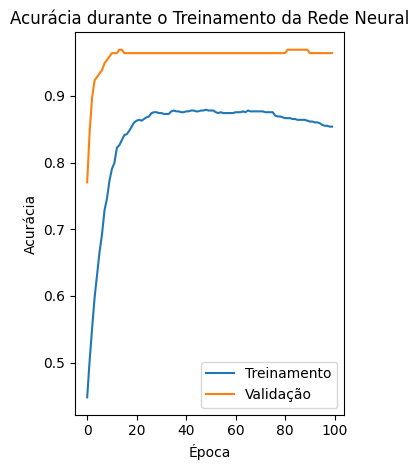

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Treinamento')
plt.plot(range(epochs), val_accuracies, label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia durante o Treinamento da Rede Neural')

plt.tight_layout()
plt.show()

## Accuracy and matrix confusion

In [ ]:
def calculate_confusion_matrix(y_true, y_pred):
    true_positive = true_negative = false_positive = false_negative = 0

    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            true_positive += 1
        elif true == 0 and pred == 0:
            true_negative += 1
        elif true == 0 and pred == 1:
            false_positive += 1
        elif true == 1 and pred == 0:
            false_negative += 1

    return true_positive, true_negative, false_positive, false_negative

y_pred = []
for i in range(len(X_test)):
    x = X_test[i]
    activations = forward(x)
    y_pred.append(activations[-1][0])

y_pred = [(1 if p >= 0.5 else 0) for p in y_pred]
Y_test = Y_test.flatten()

true_positive, true_negative, false_positive, false_negative = calculate_confusion_matrix(Y_test, y_pred)

print("Matriz de Confusão:")
print(f"Verdadeiro Positivo (TP): {true_positive}")
print(f"Verdadeiro Negativo (TN): {true_negative}")
print(f"Falso Positivo (FP): {false_positive}")
print(f"Falso Negativo (FN): {false_negative}")

Matriz de Confusão:
Verdadeiro Positivo (TP): 189
Verdadeiro Negativo (TN): 0
Falso Positivo (FP): 0
Falso Negativo (FN): 7


In [ ]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

Acurácia do modelo: 96.43%
